<a href="https://colab.research.google.com/github/Maria-Bethania/PequenosPassos/blob/main/Projeto_PandasI_Amsterd%C3%A3_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados - Airbnb


## Introdução

      * Será realizada uma análise exploratória de dados utilizando informações obtidas do site da Airbnb.
      * Objetivo: Extrair insights e ter um melhor entendimento do mercado de aluguéis.
      * Coleta de dados: Coleta indireta de dados, obtidos do site da Airbnb, com informações sobre imóveis já alugados na plataforma.
      * Os atributos serão identificados no tópico "Legendas".

### Etapas da Análise

    * Carregamento e exploração inicial dos dados;
    * Limpeza e pré-processamento dos dados;
    * Análise Exploratória dos dados;
    * Insights e conclusões.

### Ferramentas utilizadas

    * Google Colaboratory: Plataforma para escrita, execução e compartilhamento de código;
    * Pandas: Manipulação e análise dos dados;
    * Matplotlib: Visualizações gráficas;
    * NumPy: Computação numérica em Python, com suporte para funções matemáticas avançadas e manipulação de dados numéricos;
    * Pandera: Validação dos dados.

### Pré-requisitos

    * Nível - Tratamento e Análise
        - Executar todos os passos da estratégia de análise geral de dados;
        - Comentários em todos os passos;
        - Mínimo três (03) análises apenas numéricas;
        - Plotagens para no mínimo três (03) análises;
        - Apresentar conclusão da análise;

    * Nivel Infra
        - Dataset salvo em ambiente local  (Google Drive) - (bruto e tratado)
        - Dataset salvo em ambiente cloud (Cloud Storage) - (bruto e tratado)
        - Arquivo original e tratado salvos em MongoDB Atlas em coleções diferentes

### Legenda dos dados

    * realsum: Valor total em euros por duas noites;
    * room_type: Tipo de acomodação ofertada;
    * room_shared: Verifica se o espaço (ambiente) é compartilhado ou não;
    * room_private: Verifica se o espaço (ambiente) é privado ou não;
    * person_capacity: Quantidade (máximo) de pessoas permitidas no ambiente;
    * host_is_superhost: Verifica se o anfitrião é classificado como superhost;
    * multi: Verifica se o host tem de 2 - 4 unidades para aluguel.
    * biz: Verifica se o host tem mais de 4 unidades para aluguel.
    * cleanliness_rating: Classificação da limpeza realizada no ambiente;
    * guest_satisfaction: Nível de satisfação do hóspede;
    * bedrooms: Quantidade de quartos;
    * dist: Distância entre o móvel e o centro da cidade.
    * metro_dist: Distância entre o móvel e a estação de metrô mais próxima.
    * attr_index: índice de atração do local do anúncio
    * attr_index_norm: índice de atração normalizado (0-100) - (proximidade ou avaliação de satisfação com a atração turística?)
    * rest_index: índice do restaurante do local da listagem
    * attr_index_norm: índice de restaurante normalizado (0-100) - (proximidade ou avaliação de satisfação com restaurante?)
    * lng: Longitude - Coordenada geográfica de localização;
    * lat: Latitude - Coordenada geográfica de localização;


**Fonte**: GYÓDI, K.; NAWARO,T. Determinants of Airbnb prices in European cities: A spatial econometrics approach, **Tourism Management**, Volume 86, 2021. Disponível em: https://www.sciencedirect.com/science/article/pii/S0261517721000388?via%3Dihub#bib1 Acesso em: 06/07/2023



### Método 5 w's

    Usando a técnica dos 5 W's para identificar o problema de negócios.
      WHO: Próprietários com imóveis alugados através da Airbnb ou possíveis hóspedes.
      WHAT: O que influencia a demanda e satisfação dos hóspedes;
      WHERE: Imóveis alugados na plataforma da Airbnb na cidade de Amsterdã (HOLANDA);
      WHEN: O período não foi especificado.
      WHY: Melhorar a experiência do hóspede, identificar maior demanda e entender os fatores de satisfação.

## Instalação de pacotes e importação de bibliotecas

In [ ]:
!pip install gcsfs # Instalação do GCP;
!pip install pandera # Instalação do pandera, biblioteca de validação de dados.

In [2]:
import os # A biblioteca 'os' interage com o sistema operacional
import pandas as pd              # Atribuindo à biblioteca pandas o apelido 'pd'.
import numpy as np               # Atribuindo à biblioteca numpy o apelido 'np'.
import matplotlib.pyplot as plt  # Atribuindo à biblioteca matplotlib o apelido 'plt'.
import pandera as pa             # Atribuindo à biblioteca pandera o apelido 'pa'.
from google.cloud import storage # Interação com o Google Cloud Platform (GCP).


In [3]:
import warnings # Ignorado avisos
warnings.filterwarnings("ignore")

In [4]:
# Quantidade de colunas que serão apresentadas no Datraframe

pd.set_option('display.max_columns',100) # Função que controla exibição;
                                         # Nesse caso, limita-se o máxmo de colunas exibidas em 100.
                                         # pd.set_option('display.precision',2) - Aqui eu estaria definindo a precisão decimal em duas casas.

## Extração

### Google Drive

In [6]:
# Função drive.mount('/content/drive') - Trazendo o Google Drive para este ambiente de execução.
# Para acesso e manipulação dos arquivos do Google Drive diretamente no meu código.

from google.colab import drive # Autorização para acessar o google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Definindo o caminho para a base de dados que será trabalhada.
path = '/content/drive/MyDrive/AD2 - Analista de Dados/Atividades/airbnb.csv'

In [8]:
# Leitura do arquivo e armazenamentos destes dados em um dataframe(df).
df = pd.read_csv(path)

### Google cloud

In [ ]:
# # CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
# serviceAccount = '/content/naohabemusfolga-a6e34bd4a7d7.json'
# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# # Configurações Google Cloud Storage - ACESSO AO BUCKET
# client = storage.Client()
# bucket = client.get_bucket('nao_teras_descanso_no_final_de_semana') # nome da bucket
# bucket.blob('airbnb(1).csv')                                     # nome do arquivo
# path = 'gs://nao_teras_descanso_no_final_de_semana/Projeto_PandasI/Bruto/airbnb (1).csv'   # gsutil

In [ ]:
# # Abertura da base de dados e cópia de segurança (bucket)
# df = pd.read_csv(path,
#                  sep=',',
#                  encoding='ISO-8859-1')
# dfback = df.copy()

### Pré-análise

#### Visualização do dataframe.

In [9]:
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


    A base de dados apresenta 1.103 linhas e 20 colunas (atributos).
    Do quantitativo de linhas, 1.102 são registros.

    Comandos importantes, a saber:
    - df.head() - Visualisação dos 05 primeiros registros da base de dados;
    - df.tail() - Visualização dos 05 últimos registros da base de dados;
    - df.sample() - Visualização de uma amostra aleatória dos registros de um dataframe;
    - df.count() - Retorna a quantidade de observações (registros) em uma base de dados;
    

#### Tamanho do dataframe

    A função '.shape' retorna uma dimensão (tamenho) do dataframe;
    O retorno será no formato '(nº de colunas, nº de linhas);
    Importante para entender o quantitativo de dados que será manipulado.

In [10]:
df.shape

(1103, 20)

#### Informações detalhadas do dataframe

    Auxílio para se ter uma visão geral do banco de dados;
    Importante para identificar ausências ou inconsistências;
    Extremamente útil para verificação do tipo de dado e necessidade de realizar uma tipagem do mesmo.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

#### Backup local do dataframe

    Necessário para realizar modificações no dataframe, sem afetar a base de dados original.
    Torna-se uma 'nova' base de dados, separada da original.

In [12]:
dfbackup1 = df.copy()

## Transformação

    Considerando a pré-visualização disponível através da comando df.
    Considerando que foi possível observar que não há duplicidade nos atributos.

    Não há necessidade de excluir colunas por duplicidade.



    Todavia, foi observada redundância quanto aos atributos relacionados aos tipos de quarto.

    Serão excluídos dois atributos, que mostram-se desnecessários, já que um outro atributo já contém todas as informações pertinentes.

### Renomeando os atributos

    inplace = True
        - Caso não fosse utilizado, a mudança não ocorreria.
        - Seria mostrada apenas uma prévia de como ficaria a base de dados.
        - Sua inserção efetiva a execução do comando.

In [13]:
df.rename(columns={'Unnamed: 0': 'id', 'room_type':'tipo_quarto','room_shared':'compartilhado','room_private':'privado','person_capacity':'capacidade','bedrooms':'qnt_quartos','cleanliness_rating':'nota_limpeza','host_is_superhost':'superhost','guest_satisfaction_overall':'satisfacao','dist':'distancia_centro','metro_dist':'distancia_metro','realSum':'preco_total','lat':'latitude','lng':'longitude'}, inplace = True)

In [14]:
df

,id,preco_total,tipo_quarto,compartilhado,privado,capacidade,superhost,multi,biz,nota_limpeza,satisfacao,qnt_quartos,distancia_centro,distancia_metro,attr_index,attr_index_norm,rest_index,rest_index_norm,longitude,latitude
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


### Modificando apresentação

Colunas - carcteres minúsculos

In [15]:
colunas = df.columns

for coluna in colunas:
  if type(coluna) == str:
    coluna = str.lower(coluna)
  else:
    pass


#### Registros do atributo 'tipo_quarto'

In [16]:
#Demosntrando os registros de tipo de quarto.

df['tipo_quarto'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [17]:
# Criando um dicionário para renomear, já traduzindo, as os registros de tipo de quarto
renomeando_tipo_quarto = {
    'Entire home/apt': 'APTO/CASA INTEIRA',
    'Shared room': 'QUARTO COMPARTILHADO',
    'Private room': 'QUARTO PRIVADO'
}

In [18]:
df['tipo_quarto'].replace(renomeando_tipo_quarto, inplace = True)

In [ ]:
df

#### preco_total

In [20]:
df['preco_total'] = df['preco_total'].round(2)

In [21]:
df['distancia_centro'] = df['distancia_centro'].round(2)

In [22]:
df['distancia_metro'] = df['distancia_metro'].round(2)

In [23]:
df['attr_index_norm'] = df['attr_index_norm'].round(2)

In [24]:
df['rest_index_norm'] = df['rest_index_norm'].round(2)

In [ ]:
df

### Verificando inconsistências

In [26]:
df['tipo_quarto'].unique() # verificar o que está nos registros do quarto.

array(['QUARTO PRIVADO', 'APTO/CASA INTEIRA', 'QUARTO COMPARTILHADO'],
      dtype=object)

      Também pode-se substituir um objeto utilizando o método loc.

      df.loc[df.tipo_quarto == 'Private room',['tipo_quarto']] = 'Quarto privado'




      Pelo método '.unique()', pode-se verificar que dentre os registros do 'tipo_quarto', estão 'compartilhado' e 'privado'.

      Esses valores compõem dois atributos (colunas) da base de dados.

      Será feita uma verificação se há algum quarto que seja compartilhado e privado ao mesmo tempo.



In [ ]:
ftcompartilhado = df.compartilhado == True
ftprivado = df.privado == True
df.loc[ftcompartilhado & ftprivado]

# Através do método loc, o código acima pergunta se há quartos compartilhados e privados, ao mesmo tempo.
# & = Ampersand ou E comercial. É o 'AND' da biblioteca pandas.

O resultado foi:

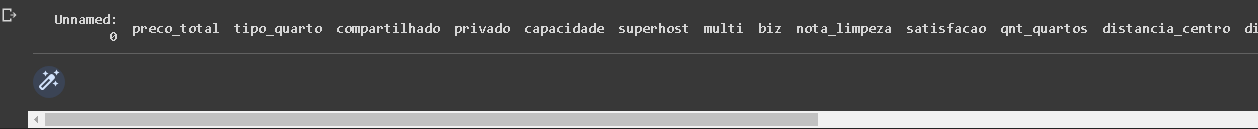
      
      
      Não foi localizado nenhum quarto compartilhado e privado ao mesmo tempo.

      Como esses atributos estão presentes na coluna 'tipo_quarto' como registro, serão excluídos posteriormente.

### Verificando valores nulos

Através do uso do df.info(), temos os seguintes resultados:

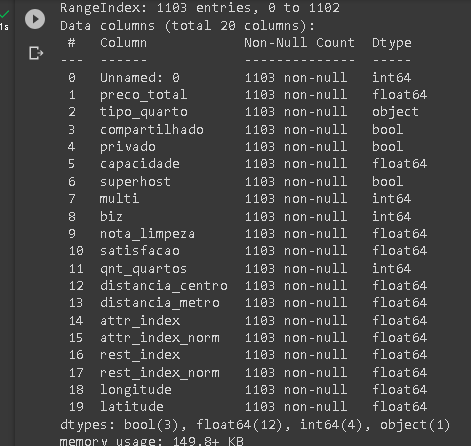


      Pela informação detalhada trazida pelo comando, pode-se observar que não há valores nulos.

      Essa identificação também pode ser feita pelo comando abaixo:

In [ ]:
df.isnull().sum()

      df.isna.sum() - Mais uma maneira de exclusão dos nulos.
      (df.isna.sum() / len(df)) * 100 - Verificaçáo da porcentagem de nulos (soma nulos/len)

### Atributos a serem analisados:

Considerando os 5 w's estabelecidos, dentre os atributos acima ilustrados, serão trabalhados os seguintes:

    - preco_total
    - tipo_quarto (compartilhado e privado);
    - capacidade;
    - superhost;
    - nota_limpeza;
    - satisfacao;
    - distancia_centro;
    - distancia_metro;
    - attr_index_norm;
    - rest_index_norm.

### Tipagem

      Através do 'df.dtypes' verifica-se o tipo de dados que compõem cada atributo

In [29]:
df.dtypes

id                    int64
preco_total         float64
tipo_quarto          object
compartilhado          bool
privado                bool
capacidade          float64
superhost              bool
multi                 int64
biz                   int64
nota_limpeza        float64
satisfacao          float64
qnt_quartos           int64
distancia_centro    float64
distancia_metro     float64
attr_index          float64
attr_index_norm     float64
rest_index          float64
rest_index_norm     float64
longitude           float64
latitude            float64
dtype: object

 Já sabendo os atributos que serão trabalhados, é feita uma análise para saber se a tipagem destes atributos está correta.

      preco_total - float64 - OK
      tipo_quarto - object - OK
      compartilhado - bool - OK
      privado - bool - OK      
      capacidade - float64 - Precisa de tipagem
      superhost - bool - OK
      nota_limpeza - float64 - OK
      satisfacao - float64 - OK
      distancia_centro - float64 - OK
      distancia_metro  - float64 - OK
      attr_index_norm - float64 - OK
      rest_index_norm - float64 - OK

    O atributo 'capacidade' necessita de tipagem. O mesmo está classificado como tipo float.

    É sabido pela legenda que o atributo 'capacidade' refere-se à quantidade máxima de pessoas permitida no ambiente.

    Considerando que não se quantifica pessoas de forma decimal, será necessária fazer a tipagem para tipo int.

In [30]:
# .astype() - Método usado para conversão.
df['capacidade'] = df['capacidade'].astype(int)

In [31]:
df['id'] = df['id'].astype(str)

In [ ]:
df.dtypes

### Excluindo colunas

    Para excluir colunas ou linhas de um dataframe utiliza-se o método .drop()

    Ao utilizar o método, usa-se a seguinte sintaxe:
      df.drop('nome da coluna a ser removida', axis = 1)
    
    O uso do 'axis = 1' indica que você quer remover uma coluna.
    Para remover uma linha, utiliza-se 'axis = 0', com a seguinte sintaxe:
      df.drop('número do índice', axis = 1)

In [33]:
# Retirada de colunas com problemas e/ou não utilizadas na análise
df.drop(['compartilhado',
         'privado',
         'multi',
         'biz',
         'qnt_quartos',
         'attr_index',
         'rest_index',
         'longitude',
         'latitude'],axis=1,inplace=True)

In [ ]:
df

In [35]:
dfbackup2 = df.copy()

### Criando um novo dataframe

In [36]:
df_final = df


In [ ]:
df_final

## Verificando a qualidade dos dados

      Validação Schema: Define o esquema do Dataframe, especificando tipos dedados e restrições para cada coluna.

      O Schema valida e garante a integridade dos dados.

      A sintaxe para este comando é:
        schema = pa.DataFrameSchema({'nome da coluna': pa.Column(pa.tipo de dado),
        })
      
      O comando 'schema.validate(df)' faz que o dataframe seja validado em relação ao schema.
        - Cada coluna do DataFrame é verificada em relação às regras e restrições definidas no schema.
        - Caso alguma coluna não atenda às regras, uma exceção será lançada indicando o motivo da falha na validação.


In [38]:
# Nossas colunas do dataframe
df_final.dtypes

id                   object
preco_total         float64
tipo_quarto          object
capacidade            int64
superhost              bool
nota_limpeza        float64
satisfacao          float64
distancia_centro    float64
distancia_metro     float64
attr_index_norm     float64
rest_index_norm     float64
dtype: object

In [39]:
# Definir o esquema de validação
schema = pa.DataFrameSchema({'id': pa.Column(pa.String),
                            'preco_total': pa.Column(pa.Float),
                            'tipo_quarto': pa.Column(pa.String),
                            'capacidade': pa.Column(pa.Int),
                            'superhost': pa.Column(pa.Bool),
                            'nota_limpeza': pa.Column(pa.Float),
                            'satisfacao': pa.Column(pa.Float),
                            'distancia_centro': pa.Column(pa.Float),
                            'distancia_metro': pa.Column(pa.Float),
                            'attr_index_norm': pa.Column(pa.Float),
                            'rest_index_norm': pa.Column(pa.Float),
                            })



In [ ]:
# Validar o DataFrame
schema.validate(df)

### Backup local do dataframe tratado

In [41]:
dfback3 = df.copy()

### Carregando arquivo tratado na Google Cloud Plataform

In [ ]:
# df_final.to_csv('gs://nao_teras_descanso_no_final_de_semana/Projeto_PandasI/Tratado/airbnb_tratado.csv', index = False)

## Análises

### Método describe

      Retorna todas as medidas estatísticas dos atributos.

### Análise geral

#### preco_total *x* distância do centro e acesso ao metrô.

In [45]:
# Medidas estatísticas do atributo preço
(df['preco_total'].describe()).round(2)

count    1103.00
mean      545.02
std       416.97
min       128.89
25%       309.80
50%       430.25
75%       657.32
max      7782.91
Name: preco_total, dtype: float64

Legenda para as medidas estatísticas:

      Count: contagem total de ocorrências;
      Mean: média aritmética;
      std: Desvio-padrão;
      Min: Valor mínimo;
      25%: 1º Quartil;
      50%: Mediana (.median);
      75%: 3º quartil;
      Max: Valor máximo.

In [46]:
print(f"Os valores do aluguel dos imóveis estão entre {df['preco_total'].min()} e {df['preco_total'].max()} euros.")
print("=========================================================================")
print(f"Média e mediana do atributo 'preco_total' tem os seguintes valores, respectivamente: {df['preco_total'].mean():.2f} e {df['preco_total'].median():.2f}.")
print("=========================================================================")
distribuicao_preco_total = (df['preco_total'].mean()) - (df['preco_total'].median())

if distribuicao_preco_total > 1000:
  print(f"A diferença entre média e mediana é de {distribuicao_preco_total:.2f} euros.")
else:
  print(f"A diferença entre média e mediana é de {distribuicao_preco_total:.2f} euros.")


Os valores do aluguel dos imóveis estão entre 128.89 e 7782.91 euros.
Média e mediana do atributo 'preco_total' tem os seguintes valores, respectivamente: 545.02 e 430.25.
A diferença entre média e mediana é de 114.77 euros.


In [47]:
moda_preco = df['preco_total'].mode()
print(moda_preco)

0    614.44
Name: preco_total, dtype: float64


      Poder-se-ia afirmar que há uma distribuição normal dos valores dos imóveis, pela diferença entre média e mediana.
      
      Todavia, sabe-se que a média é bastante sensível à outliers, que podem influenciar no seu valor.

      Especialmente em se tratando de valores de imóveis, por diversos fatores, que apresentam valores muito altos e muito baixos na distribuição

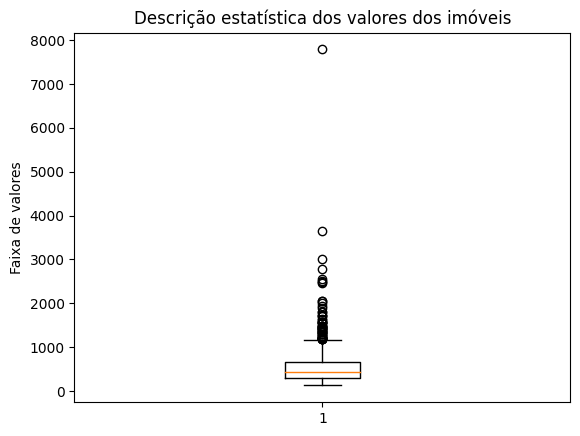

In [48]:
plt.boxplot(df['preco_total'])
plt.ylabel('Faixa de valores')
plt.title('Descrição estatística dos valores dos imóveis')
plt.show()

In [49]:
# Buscando uma correlação entre o preço dos imóveis e a distância até o centro da cidade.
correlacao_preco_distcentro = df['preco_total'].corr(df['distancia_centro'])
coef_determinacao = (correlacao_preco_distcentro ** 2)
print(f"O coeficiente de Pearson entre essas duas variáveis é de {correlacao_preco_distcentro:.2f}.")
print("========================================================================")
print(f"O coeficiente de determinação é de {coef_determinacao:.2f}.")

O coeficiente de Pearson entre essas duas variáveis é de -0.26.
O coeficiente de determinação é de 0.07.


In [50]:
# Buscando uma correlação entre o preço dos imóveis e a distância até o acesso ao metrô.
correlacao_preco_distmetro = df['preco_total'].corr(df['distancia_metro'])
coef_determinacao2 = (correlacao_preco_distmetro ** 2)
print(f"O coeficiente de Pearson entre essas duas variáveis é de {correlacao_preco_distmetro:.2f}.")
print("========================================================================")
print(f"O coeficiente de determinação é de {coef_determinacao2:.2f}.")

O coeficiente de Pearson entre essas duas variáveis é de -0.14.
O coeficiente de determinação é de 0.02.


      Conclui-se que não há uma variação de valor doos imóveis quando se trata do fator de proximidade, seja do centro, seja para acesso ao metrô.

      Há de se observar que se trata de um mercado de imóveis. Teoricamente, acesso rápido a esses locais na cidade era pra afetar de forma mais enfática esses valores.
      Porém, há outros fatores a serem avaliados, como tipo de espaço que foi alugado, quantidade de pessoas e quartos, etc.

      O que pode justificar essa baixa correlação.

<Axes: xlabel='distancia_centro', ylabel='preco_total'>

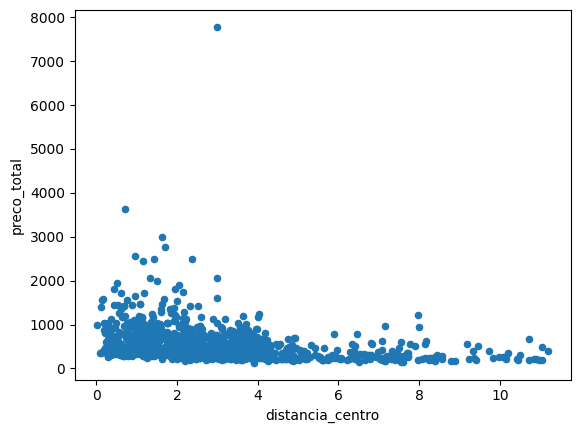

In [51]:
df.plot.scatter(x='distancia_centro', y = 'preco_total')

<Axes: xlabel='distancia_metro', ylabel='preco_total'>

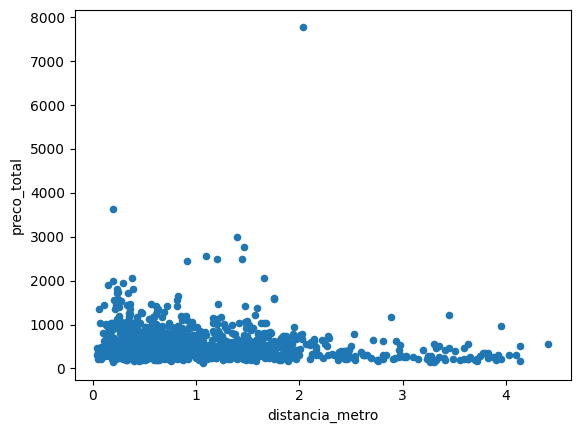

In [52]:
df.plot.scatter(x='distancia_metro', y = 'preco_total')

      Apesar de demonstrado através da correlaçao que não há influencia na variação de valores, os gráficos de dispersão podem apontar algumas coisas:
          - Há uma concentração de imóveis que custam até mil euros e estão distantes até 04 km do centro.
          - Há uma concentração de imóveis que custam até mil euros e estão distantes até 02 km do acesso ao metrô.

#### preco_total X atrações turísticas e restaurantes.

In [53]:
# Buscando uma correlação entre o preço dos imóveis e as atrações turísticas.
correlacao_preco_turismo = df['preco_total'].corr(df['attr_index_norm'])
coef_determinacao_turismo = (correlacao_preco_turismo ** 2)
print(f"O coeficiente de Pearson entre essas duas variáveis é de {correlacao_preco_turismo:.2f}.")
print("========================================================================")
print(f"O coeficiente de determinação é de {coef_determinacao_turismo:.2f}.")

O coeficiente de Pearson entre essas duas variáveis é de 0.24.
O coeficiente de determinação é de 0.06.


In [54]:
# Buscando uma correlação entre o preço dos imóveis e os restaurantes.
correlacao_preco_rest = df['preco_total'].corr(df['rest_index_norm'])
coef_determinacao_rest = (correlacao_preco_rest ** 2)
print(f"O coeficiente de Pearson entre essas duas variáveis é de {correlacao_preco_rest:.2f}.")
print("========================================================================")
print(f"O coeficiente de determinação é de {coef_determinacao_rest:.2f}.")

O coeficiente de Pearson entre essas duas variáveis é de 0.21.
O coeficiente de determinação é de 0.04.


<Axes: xlabel='attr_index_norm', ylabel='preco_total'>

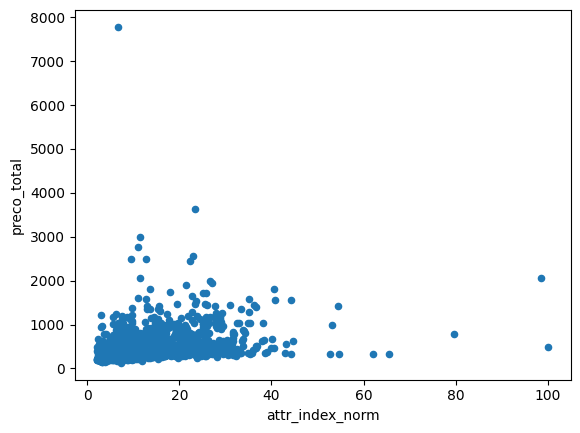

In [55]:
df.plot.scatter(x='attr_index_norm', y = 'preco_total')

<Axes: xlabel='rest_index_norm', ylabel='preco_total'>

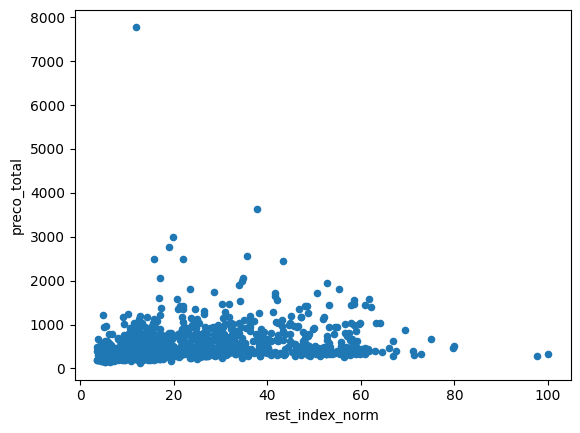

In [56]:
df.plot.scatter(x='rest_index_norm', y = 'preco_total')

Também demonstrado através da correlaçao que as atrações turísticas e os restaurantes não influenciam na variação de valores.

#### Tipo de ambiente

In [57]:
#Trazendo a contagem da categoria Tipo de quarto.

df.groupby(['tipo_quarto']).size().sort_values()

tipo_quarto
QUARTO COMPARTILHADO      6
APTO/CASA INTEIRA       538
QUARTO PRIVADO          559
dtype: int64

In [58]:
total_imoveis = (df['tipo_quarto'].count())
ft_inteiro = df.tipo_quarto == 'APTO/CASA INTEIRA'
ft_compartilhado = df.tipo_quarto == "QUARTO COMPARTILHADO"
ft_privado = df.tipo_quarto == "QUARTO PRIVADO"

In [59]:
# Calculando em porcentagem o tipo de ambiente
porcent_inteiro = ft_inteiro.sum() * 100 / total_imoveis
porcent_compartilhado = ft_compartilhado.sum() * 100 / total_imoveis
porcent_privado = ft_privado.sum() * 100 / total_imoveis

print(f"{porcent_inteiro:.2f}")
print(f"{porcent_compartilhado:.2f}")
print(f"{porcent_privado:.2f}")

48.78
0.54
50.68


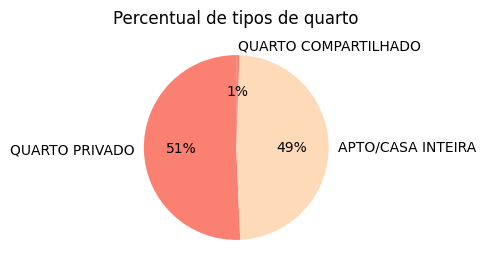

In [60]:
# Gráfico de setores
colors = ['#FA8072', '#FFDAB9']
df.groupby(['tipo_quarto'],dropna=False).size().sort_values(ascending=False).plot(kind='pie',
                                                                                  figsize=(7, 3),
                                                                                  autopct='%1.0f%%',
                                                                                  startangle=90,
                                                                                  colors=colors)
plt.title('Percentual de tipos de quarto')
plt.show()

      Do total de imóveis alugados, salta aos olhos a maior demanda:
        - Aluguel de espaço inteiro(50,68%) e espaço com quarto privado (48,78%).

#### Capacidade

In [61]:
# Total de alugueis por capacidade.

df.groupby(['capacidade']).size().sort_values()

capacidade
5     11
6     24
3     79
4    333
2    656
dtype: int64

<Axes: xlabel='capacidade'>

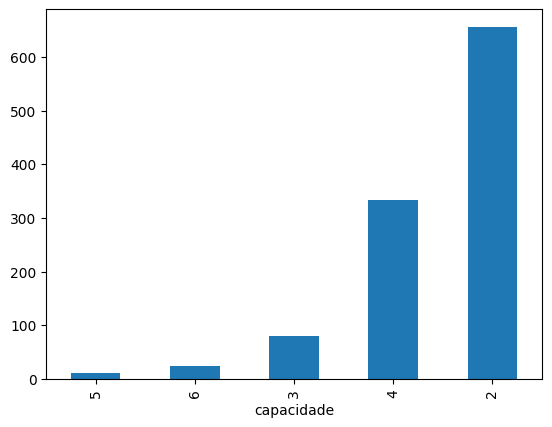

In [62]:
# Gráfico de alugueis por capacidade.
df.groupby(['capacidade']).size().sort_values().plot.bar()

In [63]:
ft_cap_4 = (df.capacidade >= 2) & (df.capacidade <= 4)
ft_cap5 = (df.capacidade >= 5) & (df.capacidade <= 6)
imoveis_alugados = df['capacidade'].count()
porcent_cap4 = ft_cap_4.sum() * 100 / imoveis_alugados
porcent_cap5 = ft_cap5.sum() * 100 / imoveis_alugados
print(f"O número de imóveis que permitem até 4 pessoas corresponde a {porcent_cap4:.2f}% de todos o aluguéis.")
print(f"O número de imóveis que permitem a partir de 5 pessoas corresponde a {porcent_cap5:.2f}% de todos o aluguéis.")



O número de imóveis que permitem até 4 pessoas corresponde a 96.83% de todos o aluguéis.
O número de imóveis que permitem a partir de 5 pessoas corresponde a 3.17% de todos o aluguéis.


In [64]:
# Do total de casas inteiras, quantas abrangem a partir de 5 pessoas?
filtro_capacidade = df[df['capacidade'] >= 5].groupby('tipo_quarto').size()
filtro_capacidade['APTO/CASA INTEIRA']
porcent_filtro_capacidade = filtro_capacidade * 100 / ft_inteiro.sum()
print(porcent_filtro_capacidade)

tipo_quarto
APTO/CASA INTEIRA    6.319703
QUARTO PRIVADO       0.185874
dtype: float64


    Apenas 6% das casas inteiras que foram alugadas permitem mais de 5 pessoas.

#### Superhosts

In [66]:
# CALCULANDO QUANTOS SUPERHOST HÁ NA BASE DE DADOS

contador_superhost = df['superhost'].value_counts()[True]
print(contador_superhost)

# PORCENTAGEM DE SUPERHOSTS

percent_superhosts = contador_superhost * 100 / total_imoveis
print(f"Do total de hosts, {percent_superhosts:.1f} por cento são considerados superhosts.")


323
Do total de hosts, 29.3 por cento são considerados superhosts.


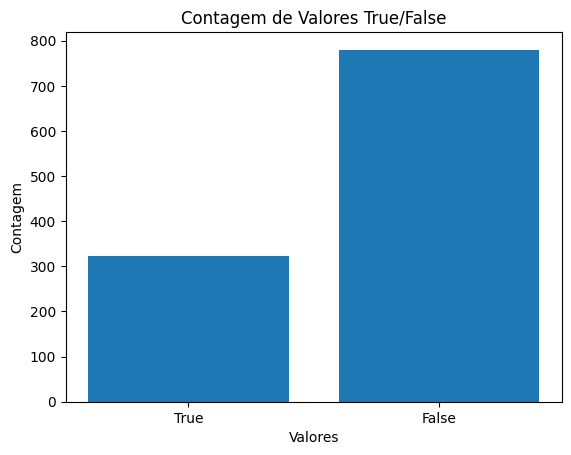

In [67]:
plt.bar(['True', 'False'], [contador_superhost, len(df) - contador_superhost])
plt.xlabel('Valores')
plt.ylabel('Contagem')
plt.title('Contagem de Valores True/False')

# Exibe o gráfico
plt.show()

      Apenas 29% dos anfitriões de Amsterdã são considerados superhosts.

#### Satisfação geral e satisfação com a limpeza

      Satisfação Geral - Escala de 0 a 100;
      A referência para os cálculos são:
          - Alta: acima de 80;
          - Média: Entre 60 e 80;
          - Baixa: Até 60.
      
      Satisfação com limpeza - Escala de 0 a 10;
      A referência para os cálculos são:
          - Alta: acima de 8;
          - Média: Entre 6 e 8;
          - Baixa: Até 6.


In [68]:
ft_alta_satisfacao = (df.satisfacao >= 80).sum()
ft_media_satisfacao = ((df.satisfacao >= 60) & (df.satisfacao < 80)).sum()
ft_baixa_satisfacao = (df.satisfacao <= 60).sum()
print(ft_alta_satisfacao)
print(ft_media_satisfacao)
print(ft_baixa_satisfacao)

1087
14
5


In [69]:
imoveis_alugados = df['satisfacao'].count()
porcent_alta_satis = ft_alta_satisfacao * 100 / imoveis_alugados
porcent_media_satis = ft_media_satisfacao * 100 / imoveis_alugados
porcent_baixa_satis = ft_baixa_satisfacao * 100 / imoveis_alugados
print(f"O número de imóveis com alta satisfação geral corresponde a {porcent_alta_satis:.2f}% de todos o aluguéis.")
print(f"O número de imóveis com média satisfação geral  corresponde a {porcent_media_satis:.2f}% de todos o aluguéis.")
print(f"O número de imóveis com baixa  geral  corresponde a {porcent_baixa_satis:.2f}% de todos o aluguéis.")

O número de imóveis com alta satisfação geral corresponde a 98.55% de todos o aluguéis.
O número de imóveis com média satisfação geral  corresponde a 1.27% de todos o aluguéis.
O número de imóveis com baixa  geral  corresponde a 0.45% de todos o aluguéis.


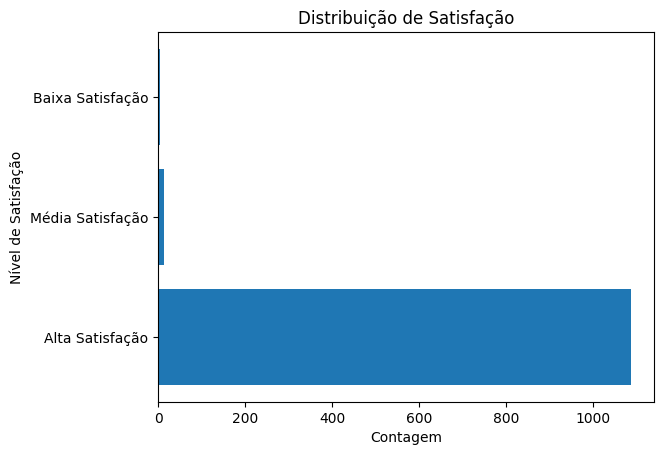

In [71]:
categorias = ['Alta Satisfação', 'Média Satisfação', 'Baixa Satisfação']
contagens = [ft_alta_satisfacao, ft_media_satisfacao, ft_baixa_satisfacao]

plt.barh(categorias, contagens)
plt.xlabel('Contagem')
plt.ylabel('Nível de Satisfação')
plt.title('Distribuição de Satisfação')
plt.show()

In [72]:
ft_alta_limpeza = (df.nota_limpeza >= 8).sum()
ft_media_limpeza = ((df.nota_limpeza >= 6) & (df.nota_limpeza < 8)).sum()
ft_baixa_limpeza = (df.nota_limpeza <= 6).sum()
print(ft_alta_limpeza)
print(ft_media_limpeza)
print(ft_baixa_limpeza)

1080
20
12


In [73]:
imoveis_alugados = df['nota_limpeza'].count()
porcent_alta_limp = ft_alta_limpeza * 100 / imoveis_alugados
porcent_media_limp = ft_media_limpeza * 100 / imoveis_alugados
porcent_baixa_limp = ft_baixa_limpeza * 100 / imoveis_alugados
print(f"O número de imóveis com alta satisfação com a limpeza corresponde a {porcent_alta_limp:.2f}% de todos o aluguéis.")
print(f"O número de imóveis com média satisfação com a limpeza corresponde a {porcent_media_limp:.2f}% de todos o aluguéis.")
print(f"O número de imóveis com baixa  satisfação com a limpeza corresponde a {porcent_baixa_limp:.2f}% de todos o aluguéis.")

O número de imóveis com alta satisfação com a limpeza corresponde a 97.91% de todos o aluguéis.
O número de imóveis com média satisfação com a limpeza corresponde a 1.81% de todos o aluguéis.
O número de imóveis com baixa  satisfação com a limpeza corresponde a 1.09% de todos o aluguéis.


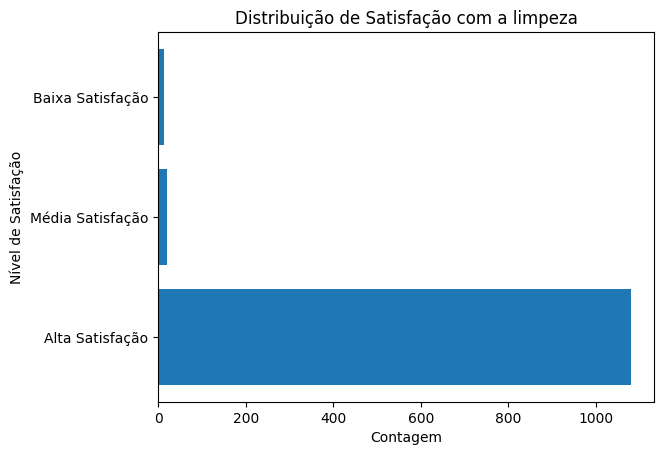

In [75]:
categorias = ['Alta Satisfação', 'Média Satisfação', 'Baixa Satisfação']
contagens = [ft_alta_limpeza, ft_media_limpeza, ft_baixa_limpeza]

plt.barh(categorias, contagens)
plt.xlabel('Contagem')
plt.ylabel('Nível de Satisfação')
plt.title('Distribuição de Satisfação com a limpeza')
plt.show()

      O nível de satisfação geral e limpeza é alto, tendo como referência um valor de avaliação para maior que 80 e maior que 8, respectivamente.

      O número de imóveis com alta satisfação geral corresponde a 98.55% de todos o aluguéis.

      O número de imóveis com alta satisfação com a limpeza corresponde a 97.91%.


### Analisando um dataframe com média a baixa satisfação geral

In [76]:
df_media_baixa_satisfacao = df.loc[(df['satisfacao'] >= 60) & (df['satisfacao'] < 80) | (df['satisfacao'] <= 60)]

In [ ]:
df_media_baixa_satisfacao

In [ ]:
# Verificando superhosts no df de média e baixa satisfação.
filtro_superhost = df_media_baixa_satisfacao.superhost =='False'
print(filtro_superhost)
print(filtro_superhost.count())


      Nenhum host de média e baixa avaliação é considerado superhosts.

In [ ]:
# Verificando satisfação com a limpeza no df de média e baixa satisfação.
limpeza = (df_media_baixa_satisfacao.nota_limpeza < 8).sum()
# Porcentagem de satisfação com a limpeza no df de média e baixa satisfação.
porcent_limpeza = limpeza * 100 / df_media_baixa_satisfacao['nota_limpeza'].count()

print(f"Dos que estão com média e baixa satisfação geral, {limpeza} dos hóspedes não estão totalmente satisfeitos com o serviço de limpeza.")
print("=========================================================")
print(f"Esse valor corresponde a {porcent_limpeza}% dos hospedes com média e baixa satisfação geral.")

In [80]:
# Verificando tipo de quarto dos hóspedes com média e baixa satifação.

df_media_baixa_satisfacao.groupby(['tipo_quarto']).size().sort_values()

quarto_privado = (df_media_baixa_satisfacao.tipo_quarto == 'QUARTO PRIVADO').sum()
casa_inteira = (df_media_baixa_satisfacao.tipo_quarto == 'APTO/CASA INTEIRA').sum()

print(f"Dos tipos de quarto locados por hóspedes que tiveram de média a baixa satisfação geral, {quarto_privado} deles são do tipo privado.\nOs demais, {casa_inteira} locações, correspondem à Apto/casa inteira.")

Dos tipos de quarto locados por hóspedes que tiveram de média a baixa satisfação geral, 10 deles são do tipo privado.
Os demais, 6 locações, correspondem à Apto/casa inteira.


In [ ]:
# Buscando uma correlação entre satisfação com o local e distância para centro
correlacao_satcen = df_media_baixa_satisfacao['satisfacao'].corr(df['distancia_centro'])
coef_determinacao_satcen = (correlacao_satcen ** 2)
print(f"O coeficiente de Pearson entre essas duas variáveis é de {correlacao_satcen:.2f}.")
print("========================================================================")
print(f"O coeficiente de determinação é de {coef_determinacao_satcen:.2f}.")

In [82]:
# Buscando uma correlação entre satisfação com o local e distância para o metrô
correlacao_satmet = df_media_baixa_satisfacao['satisfacao'].corr(df['distancia_metro'])
coef_determinacao_satmet = (correlacao_satmet ** 2)
print(f"O coeficiente de Pearson entre essas duas variáveis é de {correlacao_satmet:.2f}.")
print("========================================================================")
print(f"O coeficiente de determinação é de {coef_determinacao_satmet:.2f}.")

O coeficiente de Pearson entre essas duas variáveis é de -0.02.
O coeficiente de determinação é de 0.00.


In [83]:
# Buscando uma correlação entre satisfação e restaurantes da região.
correlacao_sarest = df_media_baixa_satisfacao['satisfacao'].corr(df['rest_index_norm'])
coef_determinacao_sarest = (correlacao_sarest ** 2)
print(f"O coeficiente de Pearson entre essas duas variáveis é de {correlacao_sarest:.2f}.")
print("========================================================================")
print(f"O coeficiente de determinação é de {coef_determinacao_sarest:.2f}.")

O coeficiente de Pearson entre essas duas variáveis é de 0.37.
O coeficiente de determinação é de 0.14.


In [84]:
# Buscando uma correlação entre satisfação e as atrações turísticas.
correlacao_satur = df_media_baixa_satisfacao['satisfacao'].corr(df['attr_index_norm'])
coef_determinacao_satur = (correlacao_satur ** 2)
print(f"O coeficiente de Pearson entre essas duas variáveis é de {correlacao_satur:.2f}.")
print("========================================================================")
print(f"O coeficiente de determinação é de {coef_determinacao_satur:.2f}.")

O coeficiente de Pearson entre essas duas variáveis é de 0.43.
O coeficiente de determinação é de 0.18.


In [85]:
# Verificando valores dos preços dos imóveis com baixa e média satisfação

print(f"Os valores do aluguel dos imóveis estão entre {df_media_baixa_satisfacao['preco_total'].min()} e {df_media_baixa_satisfacao['preco_total'].max()} euros.")
print("=========================================================================")
print(f"Média e mediana do atributo 'preco_total' tem os seguintes valores, respectivamente: {df_media_baixa_satisfacao['preco_total'].mean():.2f} e {df_media_baixa_satisfacao['preco_total'].median():.2f}.")
print("=========================================================================")
preco_total = (df_media_baixa_satisfacao['preco_total'].mean()) - (df_media_baixa_satisfacao['preco_total'].median())

if distribuicao_preco_total > 1000:
  print(f"A diferença entre média e mediana é de {preco_total:.2f} euros.")
else:
  print(f"A diferença entre média e mediana é de {preco_total:.2f} euros.")

Os valores do aluguel dos imóveis estão entre 209.03 e 722.71 euros.
Média e mediana do atributo 'preco_total' tem os seguintes valores, respectivamente: 438.69 e 386.07.
A diferença entre média e mediana é de 52.61 euros.


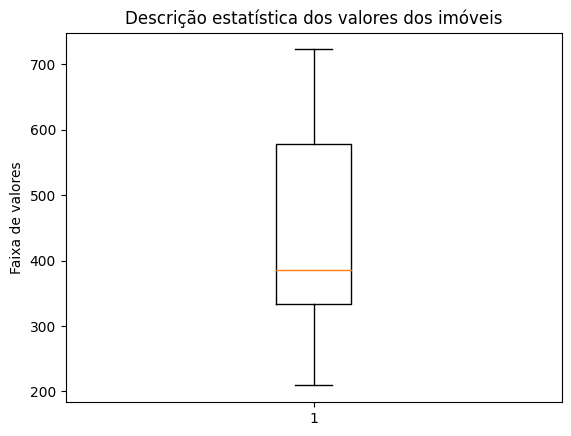

In [86]:
plt.boxplot(df_media_baixa_satisfacao['preco_total'])
plt.ylabel('Faixa de valores')
plt.title('Descrição estatística dos valores dos imóveis')
plt.show()

      A correlação demonstra que não há uma associação entre valor do imóvel e a média e baixa satisfação geral do cliente.

      Corroborando a assertiva acima, o boxplot traz à tona uma distribuição normal dos valores dos imóveis locado à esta amostra específica.

## Conclusões

A presente análise de dados trouxe informações valiosas sobre o funcionamento e dinâmica da plataforma de compartilhamento de acomodações.

Reitero que a base de dados é referente è locações realizadas em Amsterdã, Holanda, sem período especificado.

Ao examinar detalhadamente os dados, vieram à tona informações relevantes que fornecem uma visão aprofundada do mercado de hospedagem oferecido pela Airbnb.

Tais insight são fundamentais para compreender o desempenho atual da plataforma e identificar possíveis oportunidades e desafios de negócios.

O primeiro passo dado foi avaliar os valores. Afinal, o mais lógico seria associar os valores a outros diversos atributos, como tipo de ambiente, proximidade do local para o centro, ou de acesso ao metrô. Inclusivi a proximidade desses imóveis a pontos turísticos e restaurantes.

      No geral, Os valores do aluguel dos imóveis estão entre 128.89 e 7782.91 euros.

      Média e mediana são dados que buscam uma tendência.
      No que tange aos valores do imóvel, média e mediana apresentaram os seguintes valores, respectivamente: 545.02 e 430.25.

      Poder-se-ia afirmar que há uma distribuição normal dos valores dos imóveis, pela diferença entre média e mediana.

      Todavia, sabe-se que a média é bastante sensível à outliers, que podem influenciar no seu valor.

      Especialmente em valores de imóveis, por diversos fatores, que apresentam valores muito altos e muito baixos na distribuição.


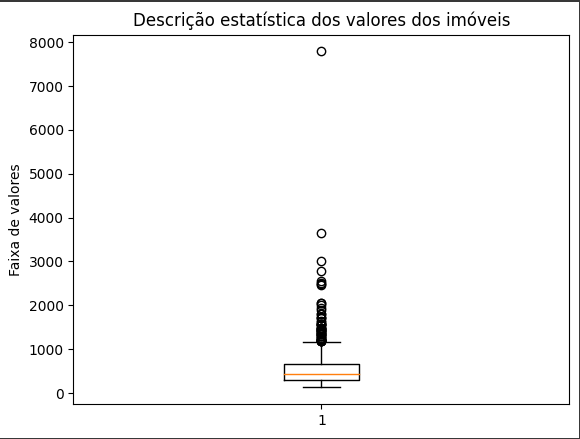

Então, se buscou associar o valor dos imóveis à distância até o centro da cidade e o acesso ao metrô. Assim como à proximidade à atrações turísticas e restaurantes.

      Para tal, foi utilizada a correlação de Pearson.

      Conclui-se que não há uma variação de valor doos imóveis quando se trata do fator de proximidade, seja do centro ou acesso ao metrô.

      Também não há influência da proximidade com pontos turísticos e com restaurantes, no valor dos imóveis.

      Há de se observar que se trata de um mercado de imóveis.
      
      Teoricamente, acesso rápido a esses locais na cidade era pra afetar de forma mais enfática esses valores.

      Porém, há outros fatores a serem avaliados, como tipo de espaço que foi alugado, quantidade de pessoas e quartos, etc.

      O que pode justificar essa baixa correlação.




 Apesar de demonstrado através da correlaçao que não há influencia na variação de valores, observa-se que:

        - Há uma concentração de imóveis que custam até mil euros e estão distantes até 04 km do centro.
        - Há uma concentração de imóveis que custam até mil euros e estão distantes até 02 km do acesso ao metrô.

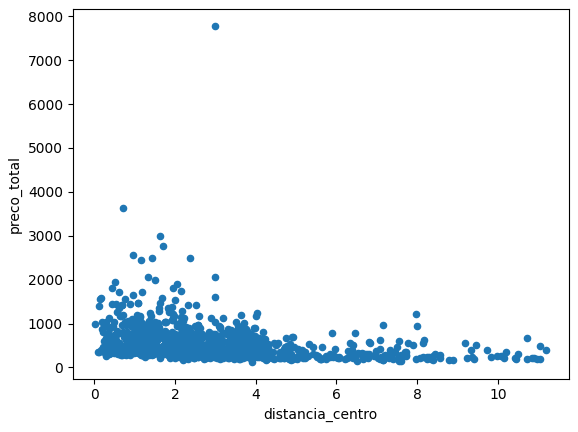

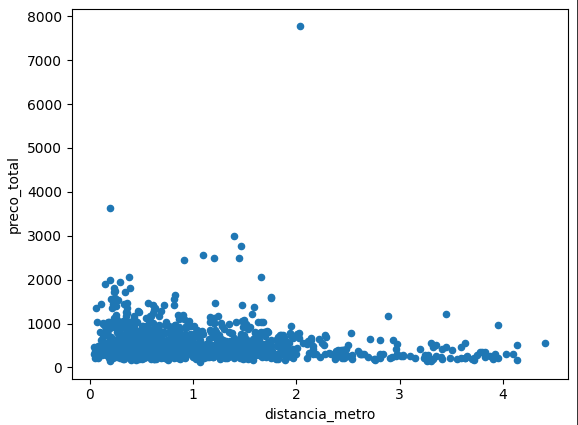

Quanto ao tipo de ambiente locado, salta aos olhos a maior demanda:

    - Aluguel de espaço inteiro(50,68%) e espaço com quarto privado (48,78%).

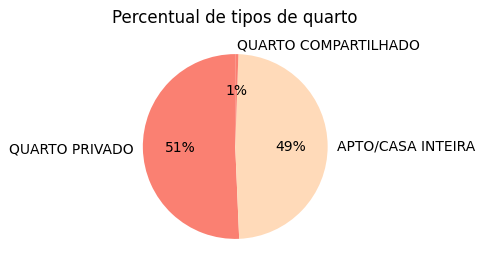

Em se tratando de capacidade permitida, temos:

      O número de imóveis que permitem até 4 pessoas corresponde a 96.83% de todos o aluguéis.

      Um dado curioso é que apenas 6% dos que alugaram ambientes inteiros, a capacidade permitida é de mais de 5 pessoas.

      Dado curioso, mas explicável. É possível que tais locações sejam apartamentos ou casas menores, com capacidade limitada em termos de espaço.
      
      Portanto, a capacidade máxima de hóspedes permitida pode ser definida de acordo com o tamanho da propriedade.

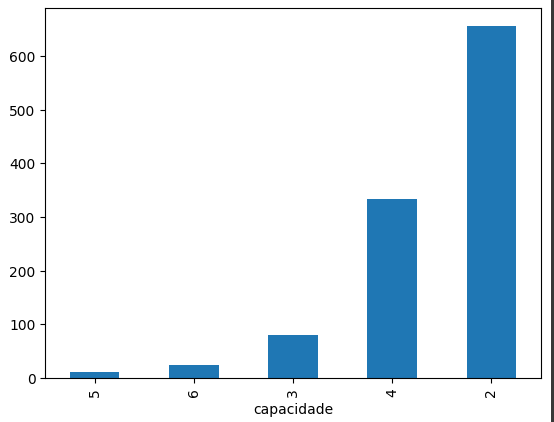

Dentro dessa análise, pode-se identificar um ponto relevante.

A presença de superhosts! Indicador crucial para a qualidade e confiabilidade das acomodações.


      Superhosts são anfitriões com um histórico comprovado de excelentes avaliações e experiência em hospedagem.
      
      Revelou-se uma baixa quantidade de superhosts no conjunto de dados examinado.
      
      Tal fato levanta preocupações em relação à oferta de acomodações e benefícios proporcionados pela experiência dos superhosts aos hóspedes.

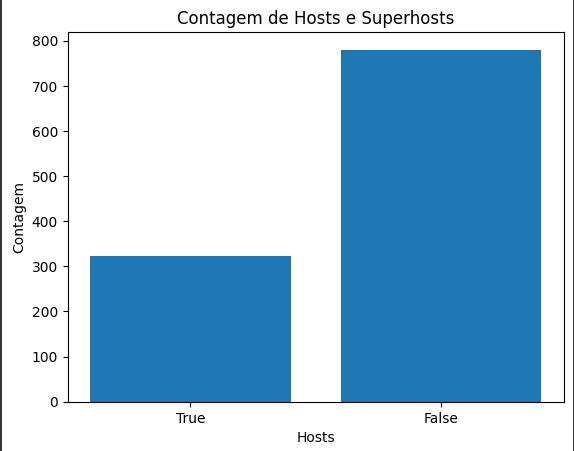

       Apenas 29% dos anfitriões de Amsterdã são considerados superhosts.

Agora, trazemos um aparato sobre a satisfação (geral) do hóspede com a experiência bem como o serviço de limpeza.

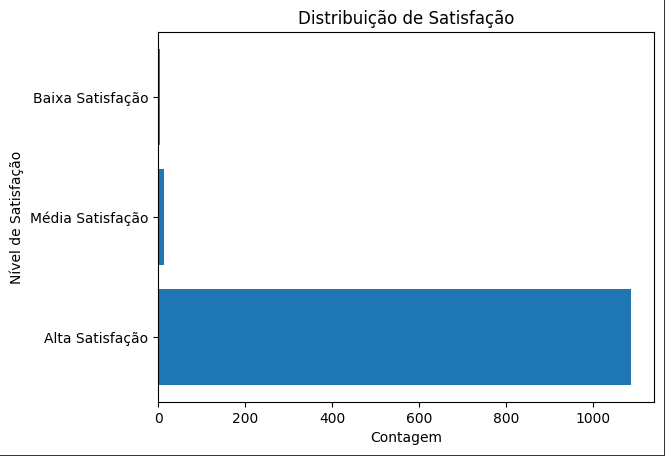

      O número de imóveis com alta satisfação com a limpeza corresponde a 97.91% de todos o aluguéis.


Os níveis de satisfação com a limpeza dos locais acompanham a satisfação geral.

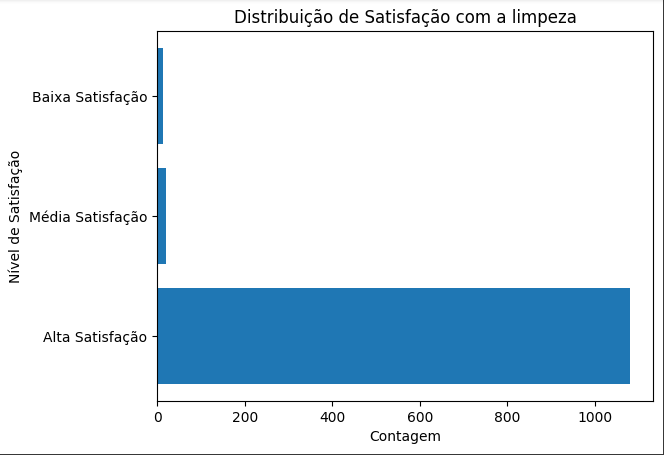

      O número de imóveis com alta satisfação com a limpeza corresponde a 97.91%.

Ante o exposto, pode-se concluir que a locação de imóveis via Airbnb em Amsterdã é uma experiência bastante exitosa.

Vide a alta satisfação do cliente coms os imóveis.

      A experiência do cliente é de extrema importência no ramo de locação de acomodações.
      
          - Impacta na reputação da empresa;
          - Fidelização hóspedes;
          - Ótima ferramenta de marketing;
          - Ferramenta para processos de melhoria contínuas.

Todavia, buscando uma avaliação mais completa da base de dados, foi necessário buscar algum tipo de desafio ou ameaça nos casos de baixa e média satisfação com a experiência de hospedagem.

Observações sobre esta amostra em específico:


      Nenhum host de média e baixa avaliação é considerado superhosts.

      Dos tipos de quarto locados por hóspedes que tiveram de média a baixa satisfação geral, 10 deles são do tipo privado.
      
      Os demais, 6 locações, correspondem à Apto/casa inteira.

      Desta amostra com média e baixa satisfação geral, 56,25% não estão totalmente satisfeitos com o serviço de limpeza.

      

Assim, como na base de dados como um todo, nesta amostra em específico não há correlação entre os valores dos imóveis e a proximidade com centros, metrô, atrações turísticas ou restaurantes.

      Corroborando a assertiva acima, o boxplot traz à tona uma distribuição normal dos valores dos imóveis locado à esta amostra específica.

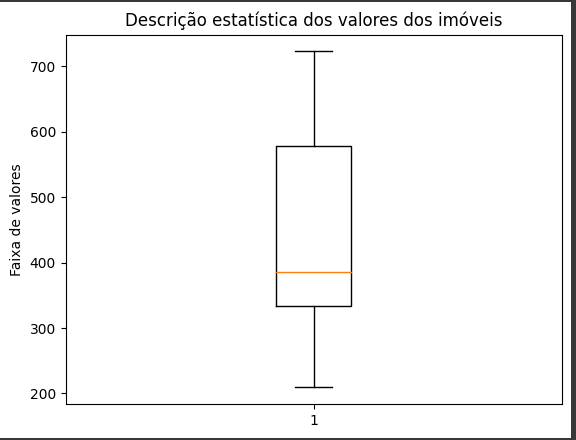



Em suma, ante todas as informações fornecidas pela base de dados, pode-se trazer um desafio a ser trabalhado: Os superhosts.

    Todas as verificações apontadas revelaram quantitativo mínimo de anfitriões considerados superhosts.

    Não considerando uma ameaça, visto que, apesar do baixo quantitativo de superhosts, o nível de satisfação do cliente com a experiência está altíssimo.

    Mas como uma oportunidade ou desafio a ser trabalhado.

    Trabalhar tal é importante por vários motivos:

      - Melhorar a experiência do cliente;
      - Melhorar a imagem da empresa;
      - Avaliações positivas influenciam diretamente se um hóspede vai ou não locar aquele imóvel.
      - Competitividade;

Um desafio que é um processo de melhoria contínua para fomentar uma base sólida de padrão de qualidade na experiência com o cliente.